In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [7]:
df = pd.read_csv('../preprocessing/output.csv')
df.head()

,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,encoded_cuisines
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,"[94, 117, 84, 121, 37]"
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,"[94, 90, 109, 31, 42, 121]"
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,"[42, 84]"
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,"[37, 11, 42, 117]"
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,"[94, 34, 65]"


In [8]:
df = df.drop(['cluster_label','cluster'],axis = 1)
df.head()

KeyError: "['cluster_label', 'cluster'] not found in axis"

In [9]:
df['num_cuisines'] = df['cuisines'].apply(lambda x: len(x.split(',')))

# Display the DataFrame with the new 'num_cuisines' column
df.head()

,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,encoded_cuisines,num_cuisines
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,"[94, 117, 84, 121, 37]",5
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,"[94, 90, 109, 31, 42, 121]",6
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,"[42, 84]",2
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,"[37, 11, 42, 117]",4
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,"[94, 34, 65]",3


In [10]:
df = df.drop('encoded_cuisines',axis=1)
df.head()

,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,num_cuisines
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,5
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,6
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,2
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,4
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,3


applying Kmeans clustering on votes and number_of_cuisines to get an idea or relation

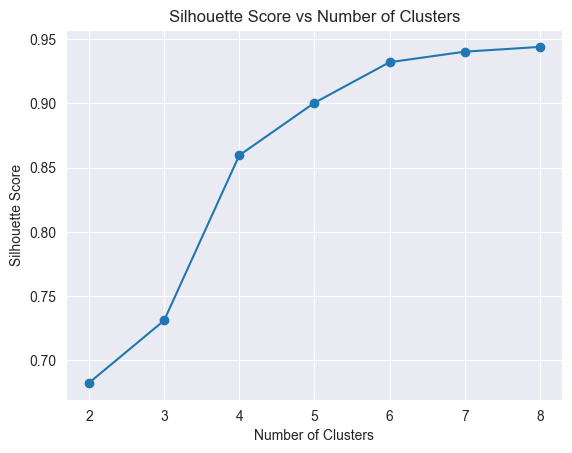

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing 'num_cuisines' and 'votes' columns

# Selecting the columns
data = df[['num_cuisines', 'votes']]

# Normalizing the data
data_normalized = (data - data.min()) / (data.max() - data.min())

# Range of clusters to try
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

silhouette_scores = []

for n_clusters in range_n_clusters:
    # Applying KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_normalized)
    
    # Calculating silhouette score
    silhouette_avg = silhouette_score(data_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

In [14]:
from sklearn.cluster import KMeans
X = df[['num_cuisines', 'votes']]

# Initialize the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(X)

# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Display the DataFrame with the cluster labels
df.head()

,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,num_cuisines,cluster
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,5,1
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,6,0
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,2,1
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,4,1
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,3,1


In [15]:
cluster_counts = df['cluster'].value_counts()
cluster_counts

cluster
1    52347
0     3555
2      283
Name: count, dtype: int64

we got around 50000 data points in a single cluster when we applies k means on  2 , 3 , 4
so we choose the largest as other data points contain around 100 - 1000 values which is a small fraction and this skews the results

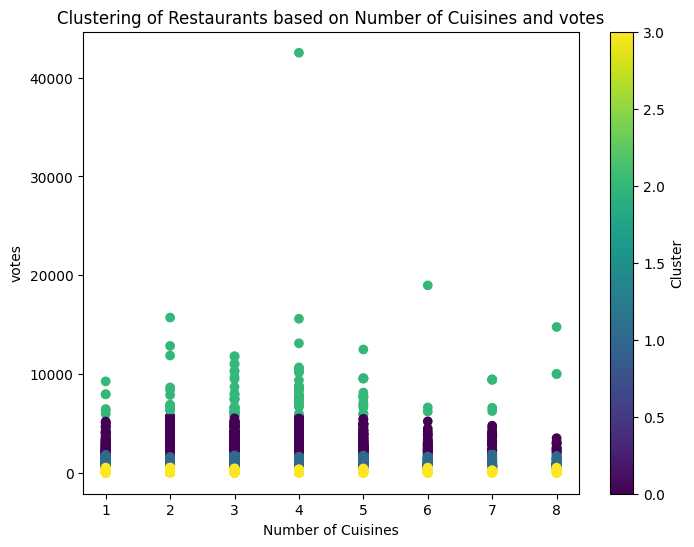

In [38]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['num_cuisines'], df['votes'], c=df['cluster'], cmap='viridis')
plt.xlabel('Number of Cuisines')
plt.ylabel('votes')
plt.title('Clustering of Restaurants based on Number of Cuisines and votes')
plt.colorbar(label='Cluster')
plt.show()

from the 2 clusters we try to find the relation between those features and average_cost_for_two

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Filter data for cluster 3
cluster3 = df[df['cluster'] == 1]

# Split data for cluster 3
X_cluster3 = cluster3[['num_cuisines', 'votes']]
y_cluster3 = cluster3['aggregate_rating']
X_cluster3_train, X_cluster3_test, y_cluster3_train, y_cluster3_test = train_test_split(X_cluster3, y_cluster3, test_size=0.2, random_state=42)

# Random Forest Regressor for cluster 3
model_cluster3 = RandomForestRegressor().fit(X_cluster3_train, y_cluster3_train)

# Make predictions for cluster 3
y_pred_cluster3 = model_cluster3.predict(X_cluster3_test)

# Calculate Mean Squared Error (MSE) and R-squared for cluster 3
mse_cluster3 = mean_squared_error(y_cluster3_test, y_pred_cluster3)
r2_cluster3 = r2_score(y_cluster3_test, y_pred_cluster3)

print("Cluster 1:")
print("  Mean Squared Error (MSE):", mse_cluster3)
print("  R-squared:", r2_cluster3)


Cluster 1:
  Mean Squared Error (MSE): 0.2457182274345659
  R-squared: 0.8881271141621204


In [17]:
X = df[['num_cuisines', 'votes', 'average_cost_for_two']]

# Initialize the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(X)

# Add the cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

df.head()


,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,num_cuisines,cluster
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,5,0
1,1,Mama Chicken Mama Franky House,Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,4.4,Very Good,1203,161,6,0
2,2,Bhagat Halwai,Agra,Shahganj,"Fast Food, Mithai",300,4.2,Very Good,801,107,2,0
3,3,Bhagat Halwai,Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",300,4.3,Very Good,693,157,4,0
4,4,The Salt Cafe Kitchen & Bar,Agra,Tajganj,"North Indian, Continental, Italian",1000,4.9,Excellent,470,291,3,0


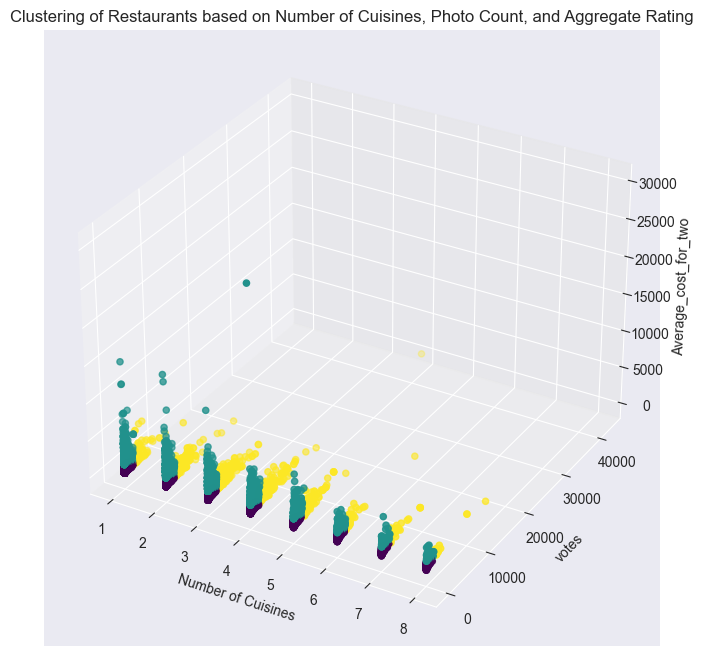

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['num_cuisines'], df['votes'], df['average_cost_for_two'], c=df['cluster'], cmap='viridis')
ax.set_xlabel('Number of Cuisines')
ax.set_ylabel('votes')
ax.set_zlabel('Average_cost_for_two')
ax.set_title('Clustering of Restaurants based on Number of Cuisines, Photo Count, and Aggregate Rating')
plt.show()


In [19]:
cluster_counts = df['cluster'].value_counts()
cluster_counts

cluster
0    49288
1     5656
2     1241
Name: count, dtype: int64

we again see that one cluster has the overWhelming majority of points so we consider only that cluster


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Filter data for cluster 1
cluster1 = df[df['cluster'] == 0]

X = cluster1[['average_cost_for_two', 'votes', 'num_cuisines']]
y = cluster1['aggregate_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree regressor
model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Decision Tree Regressor for Cluster 0:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Decision Tree Regressor for Cluster 0:
Mean Squared Error: 0.309345808119947
R-squared: 0.8601329170519475


Applying Random forest Regressor to get relationship between the above three features and target

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Filter data for cluster 0
cluster1 = df[df['cluster'] == 0]

X = cluster1[['average_cost_for_two', 'votes', 'num_cuisines']]
y = cluster1['aggregate_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest regressor
model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor for Cluster 0:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Random Forest Regressor for Cluster 0:
Mean Squared Error: 0.26675528040232543
R-squared: 0.8793897251829053


Applying gradient booster under classification between the features to get accuracy

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Filter data for cluster 0
cluster1 = df[df['cluster'] == 0]

X = cluster1[['average_cost_for_two', 'votes', 'num_cuisines']]
y = cluster1['aggregate_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the gradient boosting regressor
model = GradientBoostingRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor for Cluster 0:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Gradient Boosting Regressor for Cluster 0:
Mean Squared Error: 0.2381865186785837
R-squared: 0.8923067560941125


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Filter data for cluster 0
cluster1 = df[df['cluster'] == 0]

X = cluster1[['average_cost_for_two', 'votes', 'num_cuisines']]
y = cluster1['aggregate_rating']

# Convert 'aggregate_rating' into classes (e.g., high, medium, low) for classification
# For simplicity, let's assume two classes: 'popular' and 'not popular' based on a threshold
threshold = 3.5  # Define the threshold for 'popular' vs 'not popular'
y = ['popular' if rating >= threshold else 'not popular' for rating in y]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.847839318320146
Classification Report:
              precision    recall  f1-score   support

 not popular       0.87      0.84      0.85      5153
     popular       0.83      0.86      0.84      4705

    accuracy                           0.85      9858
   macro avg       0.85      0.85      0.85      9858
weighted avg       0.85      0.85      0.85      9858



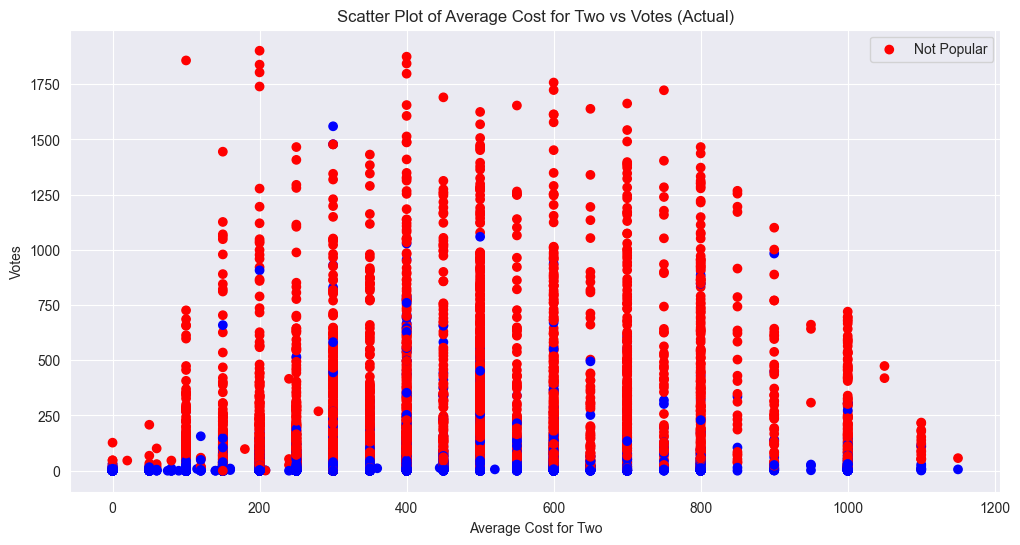

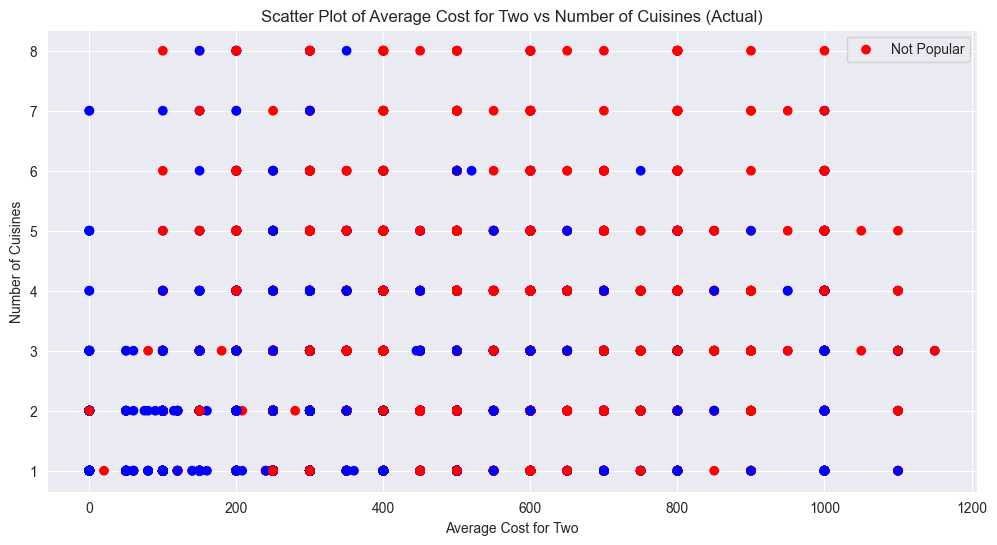

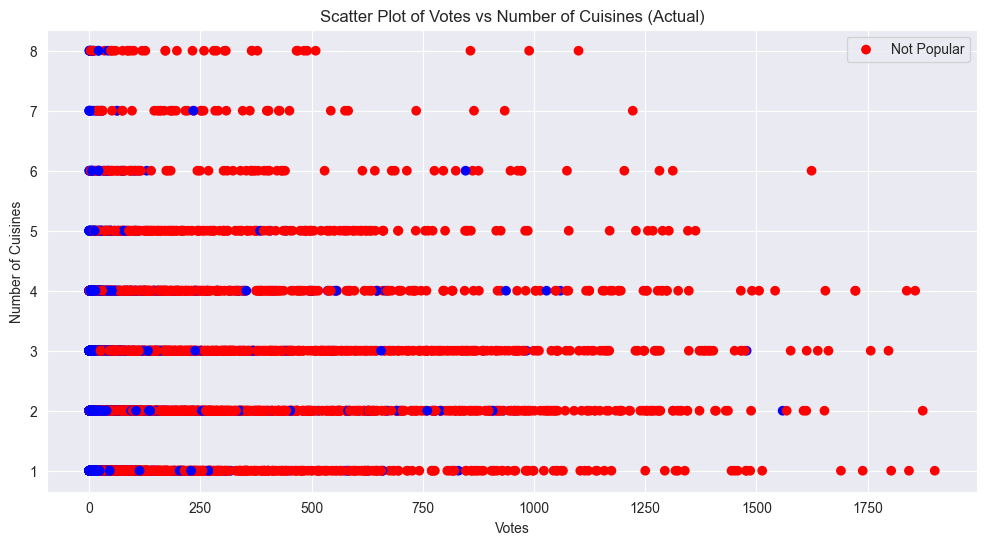

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot for 'average_cost_for_two' vs 'votes', coloring points based on classification
plt.figure(figsize=(12, 6))
plt.scatter(X_test['average_cost_for_two'], X_test['votes'], c=np.where(np.array(y_test)=='popular', 'red', 'blue'), label='Actual')
plt.xlabel('Average Cost for Two')
plt.ylabel('Votes')
plt.title('Scatter Plot of Average Cost for Two vs Votes (Actual)')
plt.legend(['Not Popular', 'Popular'])
plt.show()

# Create a scatter plot for 'average_cost_for_two' vs 'num_cuisines', coloring points based on classification
plt.figure(figsize=(12, 6))
plt.scatter(X_test['average_cost_for_two'], X_test['num_cuisines'], c=np.where(np.array(y_test)=='popular', 'red', 'blue'), label='Actual')
plt.xlabel('Average Cost for Two')
plt.ylabel('Number of Cuisines')
plt.title('Scatter Plot of Average Cost for Two vs Number of Cuisines (Actual)')
plt.legend(['Not Popular', 'Popular'])
plt.show()

# Create a scatter plot for 'votes' vs 'num_cuisines', coloring points based on classification
plt.figure(figsize=(12, 6))
plt.scatter(X_test['votes'], X_test['num_cuisines'], c=np.where(np.array(y_test)=='popular', 'red', 'blue'), label='Actual')
plt.xlabel('Votes')
plt.ylabel('Number of Cuisines')
plt.title('Scatter Plot of Votes vs Number of Cuisines (Actual)')
plt.legend(['Not Popular', 'Popular'])
plt.show()


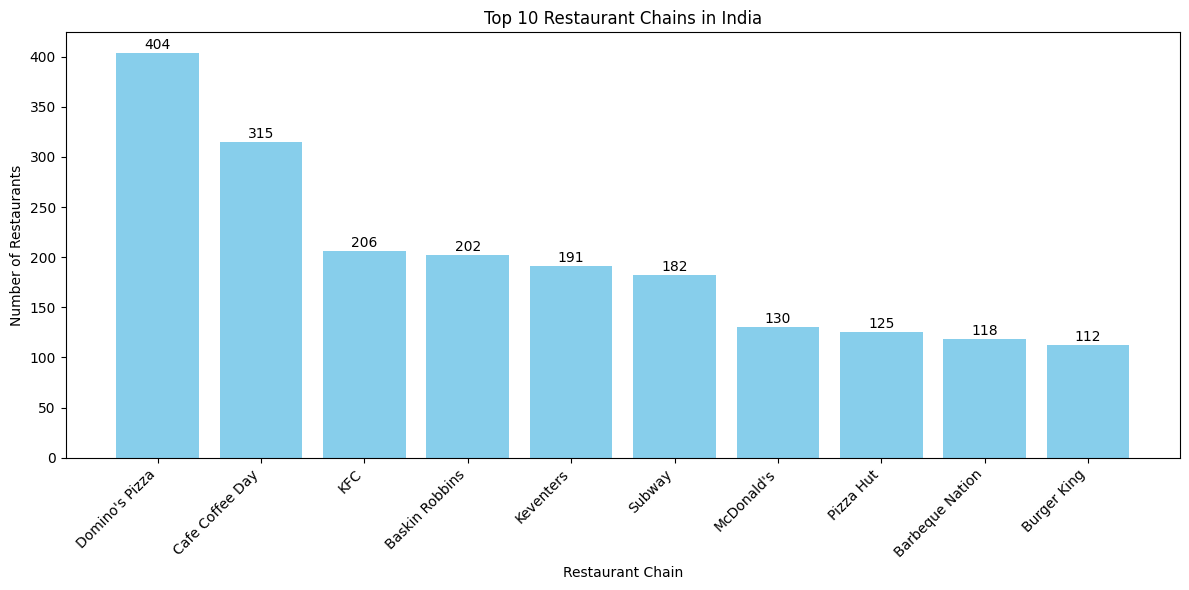

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame containing restaurant data
# Let's say the column 'name' contains the names of the restaurants
# and 'chain' contains the chain information

# Group the data by restaurant chain and count the number of occurrences
chain_counts = df.groupby('name').size().sort_values(ascending=False)

# Select the top 10 chains
top_10_chains = chain_counts.head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_chains.index, top_10_chains.values, color='skyblue')
plt.xlabel('Restaurant Chain')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Restaurant Chains in India')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()



This code above shows relation and accuracy of relation between num_cuisines , average_cost_for_two , votes and aggregate_rating

outlets = data["name"].value_counts()


In [27]:
outlets = df["name"].value_counts()



In [28]:
atleast_5_outlets = outlets[outlets > 4]


In [31]:
top10_chains2 = df[df["name"].isin(atleast_5_outlets.index)]


In [32]:
top10_chains2

,Unnamed: 0,name,city,locality,cuisines,average_cost_for_two,aggregate_rating,rating_text,votes,photo_count,num_cuisines,cluster
0,0,Bikanervala,Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,814,154,5,0
5,5,Domino's Pizza,Agra,Civil Lines,"Pizza, Fast Food",400,4.0,Very Good,707,62,2,0
7,7,Domino's Pizza,Agra,Sikandra,"Pizza, Fast Food",400,3.8,Good,617,18,2,0
8,8,Cake House,Agra,Civil Lines,"Bakery, Fast Food",500,3.4,Average,322,14,2,0
11,11,Bikanervala,Agra,Tajganj,"North Indian, South Indian, Mithai, Street Foo...",700,4.4,Very Good,523,162,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56078,210541,World of Waffles,Vadodara,"Inorbit Mall, Subhanpura",Desserts,250,4.1,Very Good,95,75,1,0
56128,210963,Tea Post,Vadodara,Sayajigunj,"Cafe, Fast Food",400,3.5,Good,65,33,2,0
56140,211049,Chatkazz,Vadodara,Manjalpur,"Fast Food, North Indian",300,3.7,Good,158,10,2,0
56180,211882,Shree Janta Ice Cream,Vadodara,Manjalpur,Ice Cream,200,2.9,Average,4,1,1,0


In [36]:
top10_chains2 = df[df["name"].isin(atleast_5_outlets.index)].groupby("name").mean()["aggregate_rating"]

TypeError: agg function failed [how->mean,dtype->object]

In [37]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [38]:
df.shape


(56185, 12)

In [39]:
print("Total Restaurants = ", data.shape[0])
print("Total Restaurants that are part of some chain = ", data.shape[0] - single.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((data.shape[0] - single.shape[0]) / data.shape[0],2)*100, "%")

Total Restaurants =  56185
Total Restaurants that are part of some chain =  20362
Percentage of Restaurants that are part of a chain =  36.0 %


In [42]:
chains.head(10)


name
Domino's Pizza     404
Cafe Coffee Day    315
KFC                206
Baskin Robbins     202
Keventers          191
Subway             182
McDonald's         130
Pizza Hut          125
Barbeque Nation    118
Burger King        112
Name: count, dtype: int64

In [43]:
top10_chains = df["name"].value_counts()[:10].sort_values(ascending=True)


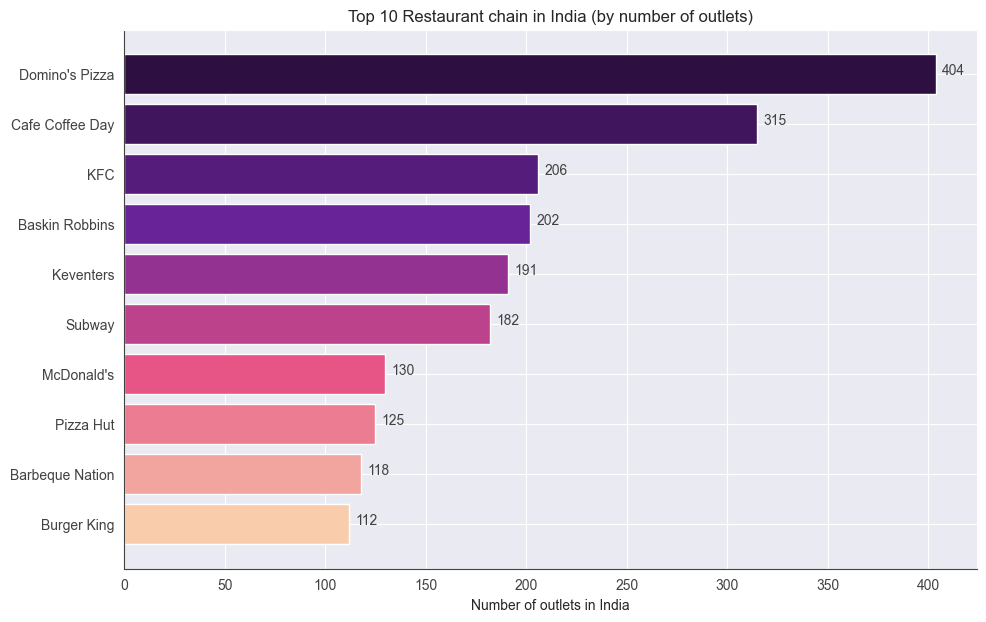

In [44]:
height = top10_chains.values
bars = top10_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)
 
plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by number of outlets)")


plt.show()

In [45]:
outlets = df["name"].value_counts()

In [46]:
atleast_5_outlets = outlets[outlets > 4]


In [57]:
cuisines = []
df["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)

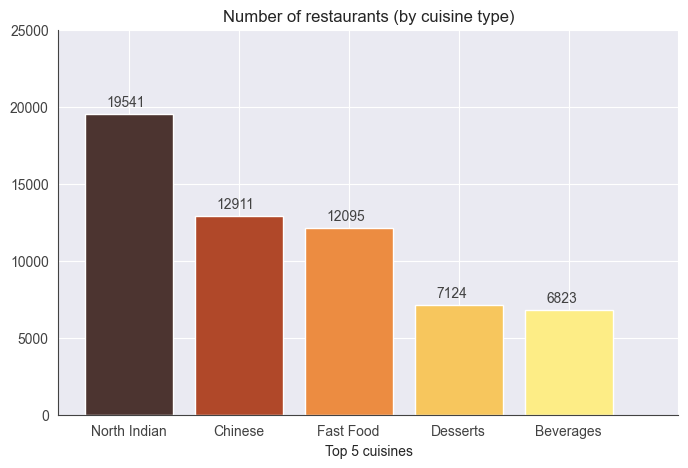

In [58]:
c_count = cuisines.value_counts()[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86']
plt.bar(c_count.index, c_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 30000, 5000), color="#424242")
plt.xlabel("Top 5 cuisines")

for i, v in enumerate(c_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by cuisine type)")


plt.show()

In [60]:
df["cuisines2"] = df['cuisines'].apply(lambda x : x.split(", "))

cuisines_list = cuisines.unique().tolist()
zeros = np.zeros(shape=(len(cuisines_list),2))
c_and_r = pd.DataFrame(zeros, index=cuisines_list, columns=["Sum","Total"])

In [62]:
for i, x in df.iterrows():
    for j in x["cuisines2"]:
        c_and_r.loc[j]["Sum"] += x["aggregate_rating"]  
        c_and_r.loc[j]["Total"] += 1

C:\Users\ompom\AppData\Local\Temp\ipykernel_1844\2449394690.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  c_and_r.loc[j]["Sum"] += x["aggregate_rating"]
C:\Users\ompom\AppData\Local\Temp\ipykernel_1844\2449394690.py:4: FutureWarning: C

In [64]:
c_and_r["Mean"] = c_and_r["Sum"] / c_and_r["Total"]
c_and_r

,Sum,Total,Mean
North Indian,61411.1,19541.0,3.142679
South Indian,18843.3,6430.0,2.930529
Mithai,8583.1,3137.0,2.736085
Street Food,10858.9,3725.0,2.915141
Desserts,23024.9,7124.0,3.232019
...,...,...,...
Swedish,3.6,1.0,3.600000
Cake,6.4,2.0,3.200000
Garhwali,3.3,2.0,1.650000
Vegan,3.5,1.0,3.500000


C:\Users\ompom\AppData\Local\Temp\ipykernel_1844\1248242467.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['aggregate_rating'], shade=True)


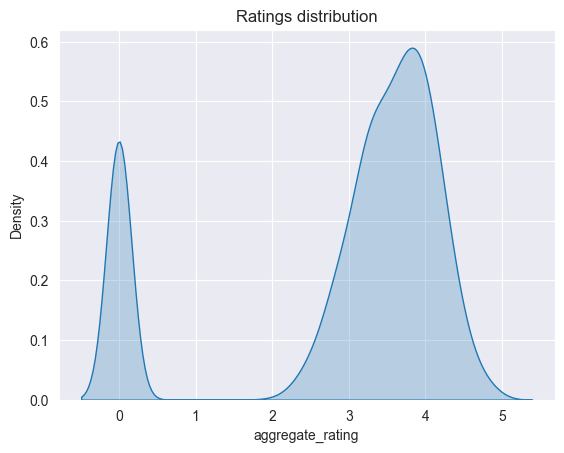

In [65]:
import seaborn as sns
sns.kdeplot(df['aggregate_rating'], shade=True)
plt.title("Ratings distribution")
plt.show()

C:\Users\ompom\AppData\Local\Temp\ipykernel_1844\1800378244.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['average_cost_for_two'], shade=True)


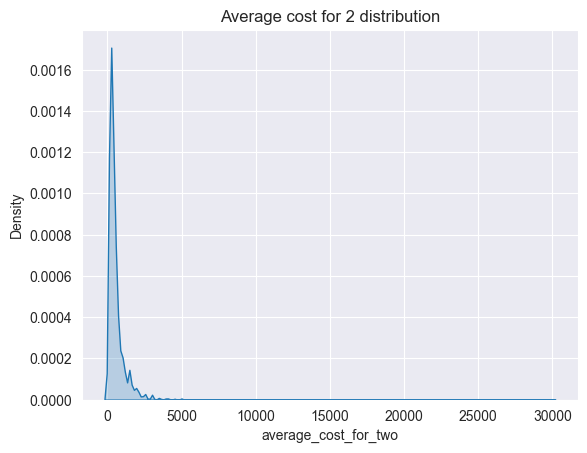

In [66]:
sns.kdeplot(df['average_cost_for_two'], shade=True)
plt.title("Average cost for 2 distribution")
plt.show()

C:\Users\ompom\AppData\Local\Temp\ipykernel_1844\2818611206.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['average_cost_for_two'], shade=True)


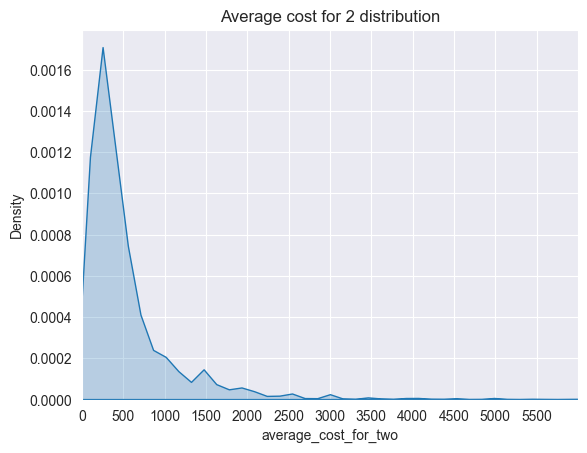

In [67]:
sns.kdeplot(df['average_cost_for_two'], shade=True)
plt.xlim([0, 6000])
plt.xticks(range(0,6000,500))
plt.title("Average cost for 2 distribution")
plt.show()

Conclusions¶
After working on this data, we can conclude the following things:-

1) Approx. 35% of restaurants in India are part of some chain
2) Domino's Pizza, Cafe Coffee Day, KFC are the biggest fast food chains in the country with most number of outlets
3) Barbecues and Grill food chains have highest average ratings than other type of restaurants
4) Establishments with alcohol availability have highest average ratings, votes and photo uploads
5) Banglore has most number of restaurants
6) After North Indian, Chinese is the most prefered cuisine in India
7) Gastro pub, Romantic Dining and Craft Beer features are well rated by customers
8) Most restaurants are rated between 3 and 4
9) Majority of restaurants are budget friendly with average cost of two between Rs.250 to Rs.800
10) There are less number of restaurants at higher price ranges
11) As the average cost of two increases, the chance of a restaurant having higher rating increases